In [224]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [225]:
df = pd.read_csv('onetwotrip_challenge_train.csv')

### Load the data using pandas and split the data frame into X (inputs) and y (outputs). 

In [226]:
X = pd.DataFrame.copy(df)
X.drop(columns = 'goal1', inplace = True)
y = pd.DataFrame.copy(df.goal1)

In [227]:
X.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,1,0,1,1,0,1,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,1,0,1,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,1,0,1,1,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,1,0,1,1,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,1,0,0,1,0,0,0,0,0


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                   stratify = y)

In [229]:
y_train.value_counts()

0    143786
1      3256
Name: goal1, dtype: int64

In [230]:
y_test.value_counts()

0    47929
1     1085
Name: goal1, dtype: int64

In [231]:
df_train = X_train.copy()
df_train['goal1'] = y_train

In [232]:
df_train.head()

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
86650,86650,d8ea59f4568a607630f320edc0f368c400c5430c4ca1cf...,0,0.149205,7,7,1,1,0,1,...,1,1,1,1,0,0,0,0,0,0
127177,127177,e1f120869fa416bdf2fc85134bbbb66196a7fc325204b2...,0,-0.005937,8,8,1,1,0,2,...,1,1,0,1,0,0,1,0,0,0
31251,31251,e19c86899685980560871a68dc6bb1dc98836c34dce584...,0,-0.471365,10,11,1,1,0,1,...,1,0,1,1,0,0,0,0,0,0
169023,169023,d11294c0f58a1cafbabc2984f54bd0779c73b9393f78b0...,84,-0.393794,2,3,2,0,2,1,...,1,1,1,1,0,0,0,0,0,0
36669,36669,d018a96d747890b43c9124cdd2ffd48a9b8a91f27f3021...,0,-0.083509,7,7,1,1,0,2,...,1,1,1,0,0,0,0,0,0,0


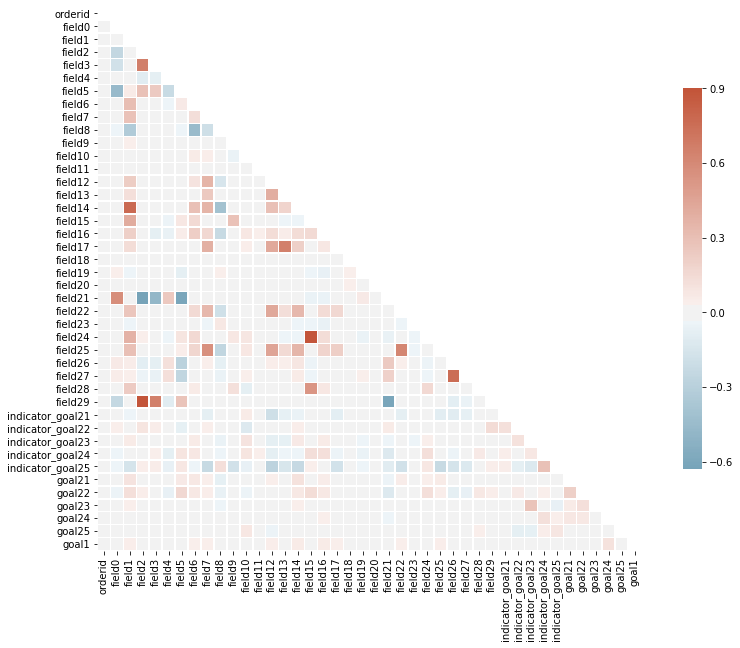

In [233]:
# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

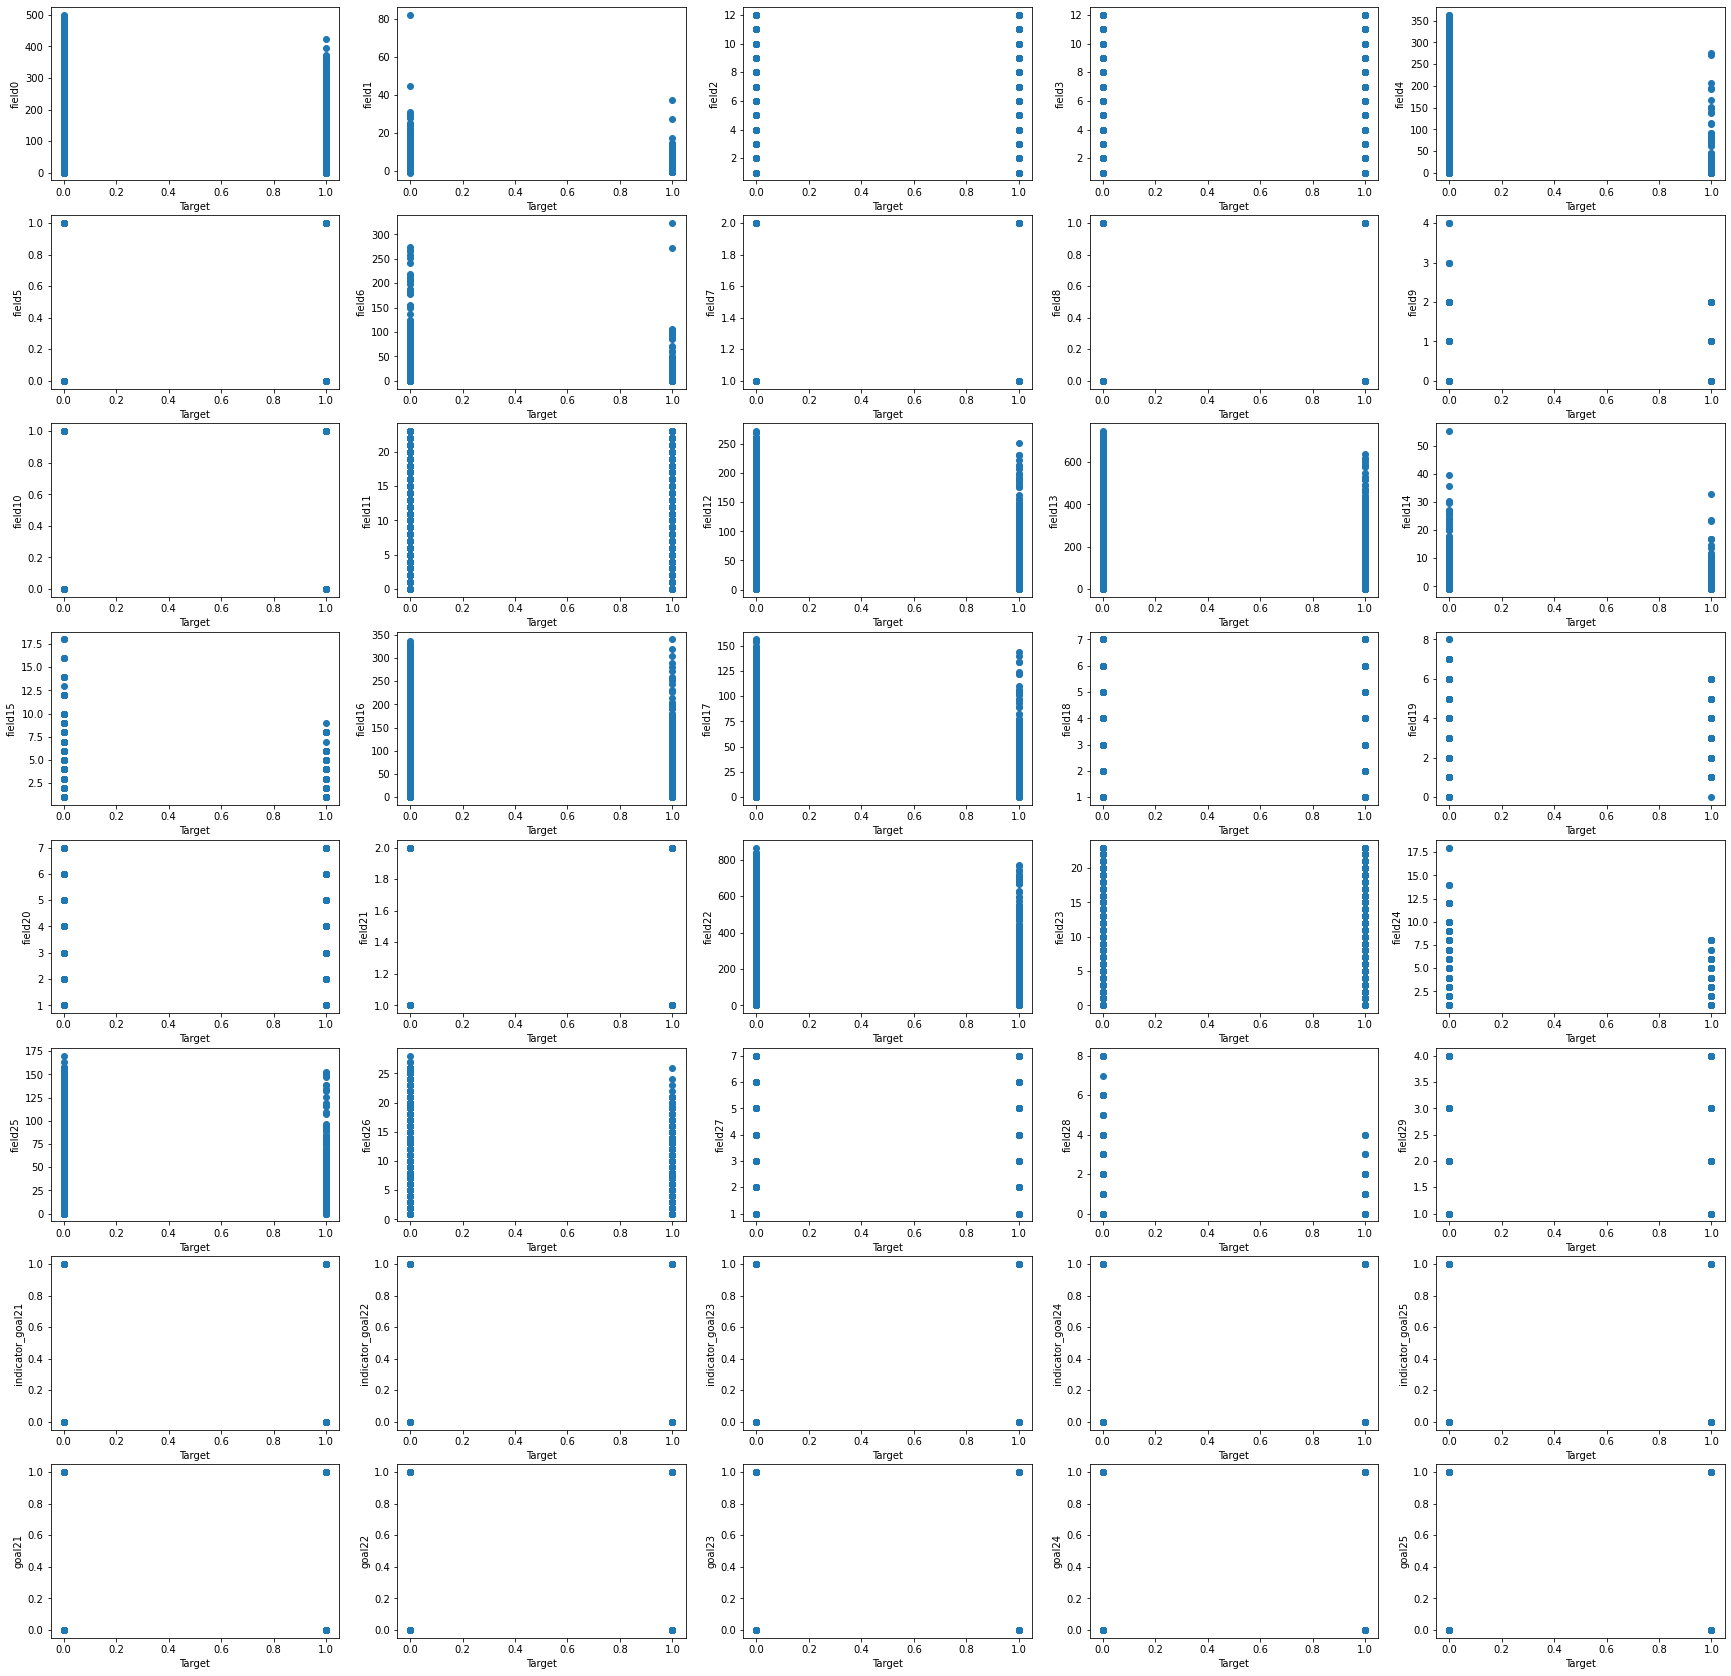

In [234]:
columns = df_train.columns.tolist()
columns.remove('userid')
columns.remove('orderid')
columns.remove('goal1')

fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(30, 30))
for i in range(len(columns)):
    y = i % 5
    x = i // 5 
    axes[x, y].scatter(df_train.goal1, df_train[columns[i]])
    axes[x, y].set_xlabel('Target')
    axes[x, y].set_ylabel(columns[i])
plt.show()

Let's found categorical features 

In [235]:
for column in X_train.columns:
    print(f'{column} {X_train[column].nunique()}')

orderid 147042
userid 92903
field0 483
field1 224
field2 12
field3 12
field4 337
field5 2
field6 133
field7 2
field8 2
field9 5
field10 2
field11 24
field12 254
field13 644
field14 138
field15 15
field16 301
field17 149
field18 7
field19 9
field20 7
field21 2
field22 752
field23 24
field24 13
field25 157
field26 28
field27 7
field28 9
field29 4
indicator_goal21 2
indicator_goal22 2
indicator_goal23 2
indicator_goal24 2
indicator_goal25 2
goal21 2
goal22 2
goal23 2
goal24 2
goal25 2


In [236]:
#field2 and filed3 are probavly months
#field18, field20 and field27 are probavly days of week

In [237]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

class Preprocesser:
    X = None
    y = None
    def fit(self,X_):
        self.X = X_
        tmp['field24'] = tmp['field24'].apply(lambda x: 6 if x > 5 else x)
    def transform(self,X_):
        tmp = X_.copy()
        #transform columns with 1,2 values to 0,1
        for column in ['field21', 'field7']: 
            tmp[column] = tmp[column].apply(lambda x: 0 if x == 2 else x)
        #scale float columns
        float_features = ['field1', 'field14']
        scaler = MinMaxScaler()
        scaler.fit(self.X[float_features])
        tmp[float_features] = scaler.transform(tmp[float_features])
        # drop irrelevant features
        features_to_drop = ["field0", "field4", "field6", "field12",
                                  "field13","field17","field19","field22","field25",
                                  "field26","field27","field28","indicator_goal21",
                                  "indicator_goal22","indicator_goal23",
                                  "goal23","goal25"]
        tmp.drop(features_to_drop, inplace=True, axis=1)
        tmp.drop(columns = 'userid', inplace = True)
        #some binary prepro, according to the feature meaning
        tmp['field9'] = tmp['field9'].apply(lambda x: not x)
        for column in ["field15","field24"]:
            tmp[column] = tmp[column].apply(lambda x: 6 if x > 5 else x)
        tmp['field16'] = tmp['field16'].apply(lambda x: 1 if x < 15 else 0)
        tmp['field18'] = tmp['field18'].apply(lambda x: 1 if x in [6,7] else 0)
        tmp['field20'] = tmp['field20'].apply(lambda x: 1 if x in [4,5,6] else 0)
        #encoding categorial features
        cat_features = ['field2', 'field3', 'field11', 
                        'field23', 'field15', 'field24', 'field29']
        ohe = OneHotEncoder(sparse=False)
        ohe.fit(self.X[cat_features])
        encoded_features = pd.DataFrame(ohe.transform(tmp[cat_features]))
        dummy_cols_names = []
        for i in range(len(cat_features)):
            tmp1 = [f'{cat_features[i]}_{cat}' for cat in ohe.categories_[i]]
            dummy_cols_names += tmp1
        
        encoded_features.columns = dummy_cols_names
        encoded_features.set_index(tmp.index, inplace = True)
        tmp.drop(cat_features, axis=1, inplace=True)
        tmp = pd.concat([tmp, encoded_features], axis=1)
        return tmp

### Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. 

In [238]:
#There is no missing variables

In [239]:
X_train.isna().sum().sum()

0

In [240]:
X_test.isna().sum().sum()

0

In [241]:
prep = Preprocesser()
prep.fit(X_train)
X_train_after_transform = prep.transform(X_train)

TypeError: list indices must be integers or slices, not str

In [ ]:
X_train_.describe()

In [ ]:
X_test_after_transform = prep.transform(X_test)

In [ ]:
X_test_after_transform.describe()

In [223]:
X_test_after_transform

,orderid,field1,field5,field7,field8,field9,field10,field14,field16,field18,...,field24_8.0,field24_9.0,field24_10.0,field24_12.0,field24_14.0,field24_18.0,field29_1.0,field29_2.0,field29_3.0,field29_4.0
195840,195840,0.002804,1,1,1,True,0,0.004988,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
173083,173083,0.012150,0,0,1,True,0,0.032419,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23610,23610,0.016822,1,1,1,True,0,0.039900,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
184,184,0.010280,1,1,1,True,1,0.009975,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77394,77394,0.014019,1,0,1,True,1,0.034913,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,2400,0.013084,1,1,1,True,0,0.014963,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
47742,47742,0.014953,0,1,1,True,0,0.017456,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
192163,192163,0.010280,1,1,1,True,0,0.024938,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65454,65454,0.019626,1,1,1,True,0,0.049875,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
#Unbalanced train set

In [53]:
y_train.value_counts()

0    191715
1      4341
Name: goal1, dtype: int64

In [ ]:
grid = {
    
    'n_estimators': range(1,10)
    
}



In [126]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
# for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):

#         X_train, X_valid = X.loc[train_index], X.loc[valid_index]
#         y_train, y_valid = y[train_index], y[valid_index]
        
#         y_pred_valid = model.predict(X_valid_sparse)
#         y_pred = model.predict(X_test_sparse, num_iteration=model.best_iteration)

#         scores.append(roc_auc_score(y_valid, y_pred_valid))
    
#model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
clf = XGBClassifier()

grid = {
    
    'max_depth': range(1,10),
    'learning_rate':np.linspace(10**-3,10**-2,10),
    'n_estimators': range(1000,3000,500),
    'reg_lambda':np.linspace(1,10,101),
    'reg_alpha':np.linspace(1,10,101)
}

xgb_gs = GridSearchCV(clf, param_grid=grid, cv=cv)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=No...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
  

In [197]:
np.linspace(1,10,101)

array([ 1.  ,  1.09,  1.18,  1.27,  1.36,  1.45,  1.54,  1.63,  1.72,
        1.81,  1.9 ,  1.99,  2.08,  2.17,  2.26,  2.35,  2.44,  2.53,
        2.62,  2.71,  2.8 ,  2.89,  2.98,  3.07,  3.16,  3.25,  3.34,
        3.43,  3.52,  3.61,  3.7 ,  3.79,  3.88,  3.97,  4.06,  4.15,
        4.24,  4.33,  4.42,  4.51,  4.6 ,  4.69,  4.78,  4.87,  4.96,
        5.05,  5.14,  5.23,  5.32,  5.41,  5.5 ,  5.59,  5.68,  5.77,
        5.86,  5.95,  6.04,  6.13,  6.22,  6.31,  6.4 ,  6.49,  6.58,
        6.67,  6.76,  6.85,  6.94,  7.03,  7.12,  7.21,  7.3 ,  7.39,
        7.48,  7.57,  7.66,  7.75,  7.84,  7.93,  8.02,  8.11,  8.2 ,
        8.29,  8.38,  8.47,  8.56,  8.65,  8.74,  8.83,  8.92,  9.01,
        9.1 ,  9.19,  9.28,  9.37,  9.46,  9.55,  9.64,  9.73,  9.82,
        9.91, 10.  ])

In [136]:
xgb_gs.best_score_

0.9778430652466642

In [170]:
import random
batch_ind_0 = random.choices(df_train[df_train.goal1 == 0].index, k = y_train.sum())
batch_ind_1 = df_train[df_train.goal1 == 1].index
batch_ind = [*batch_ind_0, *batch_ind_1]

In [174]:
batch_train = X_train[X_train.index.isin(batch_ind)]
y_train_ = df_train[df_train.index.isin(batch_ind)].goal1

In [181]:
model = XGBClassifier(max_depth=6, learning_rate=0.007, n_estimators=3000, reg_lambda=5.5, reg_alpha=1.2)
model.fit(batch_train, y_train_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.007, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1.2,
              reg_lambda=5.5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [182]:
y_pred = model.predict(batch_train)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_, y_pred)

0.7876157407407407

In [184]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_, y_pred)

array([[3487,  812],
       [1023, 3318]])

In [188]:
import xgboost.sklearn as xgb

param_dist = {'max_depth':6, 'learning_rate':0.007, 'n_estimators':3000, 'reg_lambda':5.5, 'reg_alpha':1.2}

clf = xgb.XGBModel(**param_dist)

clf.fit(X_train, y_train,
eval_set=[(X_train, y_train)],
eval_metric='auc',
verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-auc:0.62174
[1]	validation_0-auc:0.62174
[2]	validation_0-auc:0.62202
[3]	validation_0-auc:0.62207
[4]	validation_0-auc:0.62207
[5]	validation_0-auc:0.62207
[6]	validation_0-auc:0.62207
[7]	validation_0-auc:0.62207
[8]	validation_0-auc:0.62207
[9]	validation_0-auc:0.62207
[10]	validation_0-auc:0.62207
[11]	validation_0-auc:0.62207
[12]	validation_0-auc:0.62216
[13]	validation_0-auc:0.64502
[14]	validation_0-auc:0.64502
[15]	validation_0-auc:0.64502
[16]	validation_0-auc:0.64502
[17]	validation_0-auc:0.64503
[18]	validation_0-auc:0.64503
[19]	validation_0-auc:0.64504
[20]	validation_0-auc:0.64511
[21]	validation_0-auc:0.64982
[22]	validation_0-auc:0.64984
[23]	validation_0-auc:0.64985
[24]	validation_0-auc:0.65698
[25]	validation_0-auc:0.65677
[26]	validation_0-auc:0.65677
[27]	validation_0-auc:0.65677
[28]	validation_0-auc:0.65677
[29]	validation_0-auc:0.65677
[30]	validation_0-auc:0.65677
[31]	validation_0-auc:0.65683
[32]	validation_0-auc:0.65683
[33]	validation_0-au

[268]	validation_0-auc:0.68873
[269]	validation_0-auc:0.68885
[270]	validation_0-auc:0.68890
[271]	validation_0-auc:0.68899
[272]	validation_0-auc:0.68906
[273]	validation_0-auc:0.68913
[274]	validation_0-auc:0.68923
[275]	validation_0-auc:0.68929
[276]	validation_0-auc:0.68948
[277]	validation_0-auc:0.68958
[278]	validation_0-auc:0.68962
[279]	validation_0-auc:0.68979
[280]	validation_0-auc:0.68982
[281]	validation_0-auc:0.68990
[282]	validation_0-auc:0.68997
[283]	validation_0-auc:0.69002
[284]	validation_0-auc:0.69014
[285]	validation_0-auc:0.69021
[286]	validation_0-auc:0.69036
[287]	validation_0-auc:0.69040
[288]	validation_0-auc:0.69052
[289]	validation_0-auc:0.69059
[290]	validation_0-auc:0.69070
[291]	validation_0-auc:0.69076
[292]	validation_0-auc:0.69086
[293]	validation_0-auc:0.69096
[294]	validation_0-auc:0.69108
[295]	validation_0-auc:0.69116
[296]	validation_0-auc:0.69129
[297]	validation_0-auc:0.69138
[298]	validation_0-auc:0.69143
[299]	validation_0-auc:0.69154
[300]	va

[533]	validation_0-auc:0.71589
[534]	validation_0-auc:0.71600
[535]	validation_0-auc:0.71605
[536]	validation_0-auc:0.71621
[537]	validation_0-auc:0.71628
[538]	validation_0-auc:0.71634
[539]	validation_0-auc:0.71641
[540]	validation_0-auc:0.71645
[541]	validation_0-auc:0.71662
[542]	validation_0-auc:0.71668
[543]	validation_0-auc:0.71675
[544]	validation_0-auc:0.71692
[545]	validation_0-auc:0.71696
[546]	validation_0-auc:0.71705
[547]	validation_0-auc:0.71719
[548]	validation_0-auc:0.71723
[549]	validation_0-auc:0.71732
[550]	validation_0-auc:0.71739
[551]	validation_0-auc:0.71746
[552]	validation_0-auc:0.71764
[553]	validation_0-auc:0.71769
[554]	validation_0-auc:0.71781
[555]	validation_0-auc:0.71790
[556]	validation_0-auc:0.71794
[557]	validation_0-auc:0.71806
[558]	validation_0-auc:0.71814
[559]	validation_0-auc:0.71826
[560]	validation_0-auc:0.71829
[561]	validation_0-auc:0.71844
[562]	validation_0-auc:0.71851
[563]	validation_0-auc:0.71862
[564]	validation_0-auc:0.71865
[565]	va

KeyboardInterrupt: 